# NoteBook about pca 
**sources :**
- *ricco's book: https://eric.univ-lyon2.fr/ricco/cours/cours/Pratique_Methodes_Factorielles.pdf*
- *PCA4D: https://pca4ds.github.io*

## PCA using the diagonalization of the CoV matrix

1) we proof earlier that the lambda (i.e the total variance a factor Fk contain) can be found using the sum of the projected individuals on the unit vector uk or the sum of the squared correlation between the variables and the factor.
2) The R (correlation matrix) Diagonalisation take root from the second option; that can be written like this using linear algebra:
- $a^\top R a$ where $a$ is a unit vector. 
3) using the Lagrangien to maximise this equation we find two important result
- $Ra = \lambda a$ which means that $a$ is a eigenvector of R and $\lambda$ the associated eigenvalue (solving the primal problem of the Lagrangien)
- $\underset \lambda max\,L(\lambda, u1) = max\,\lambda$ wich tell us that more generaly eigen vector correspond to the best vector direction and the associated lambda explain the variance and this for every vector solution of $Ra = \lambda a$

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')
X = np.array(df)
n, p = X.shape
Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

R = 1/n * np.matmul(Z.T, Z)

print(R)

[[ 1.         -0.85613942]
 [-0.85613942  1.        ]]


In [2]:
# diagonalising the correlation matrix R

solutions = np.linalg.eig(R)

print('eigenvalues:\n', solutions[0])

print('eigenvector:\n', solutions[1])
print()
vec1 = solutions[1][:, 0]
vec2 = solutions[1][:, 1]

print('each vector is of lenght 1: \nnp.matmul(vec1.T, vec1), np.matmul(vec2.T, vec2) =', np.matmul(vec1.T, vec1), np.matmul(vec2.T, vec2))
print()
print('the basis is orthonormal:\nnp.matmul(solutions[1].T, solutions[1]):\n', np.matmul(solutions[1].T, solutions[1]))

eigenvalues:
 [1.85613942 0.14386058]
eigenvector:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

each vector is of lenght 1: 
np.matmul(vec1.T, vec1), np.matmul(vec2.T, vec2) = 1.0 1.0

the basis is orthonormal:
np.matmul(solutions[1].T, solutions[1]):
 [[1. 0.]
 [0. 1.]]


to find the coordinate of our individuals on our axis (i.e to compute factorial axis) we project coordinate $Zij$ on eigenvector:

##### $\sum_{j=1}^{k} a_{ji} Z_{ij}$


In [3]:
# example:
# Fik = np.dot(vec1, Z[0])

F1 = np.array([np.dot(vec1, Z[i]) for i in range(n)])
F2 = np.array([np.dot(vec2, Z[i]) for i in range(n)])

F_base = np.column_stack((F1, F2))

print(F_base[0:5, :])
print('. . .')


[[ 3.37308689  0.4372742 ]
 [ 1.91695448 -0.85465267]
 [ 1.7352711  -0.37951386]
 [ 2.18826537  0.12821559]
 [ 1.61970026  0.43541338]]
. . .


In [4]:
from plots_lib import plot_pca_scatter
from plots_lib import plot_z

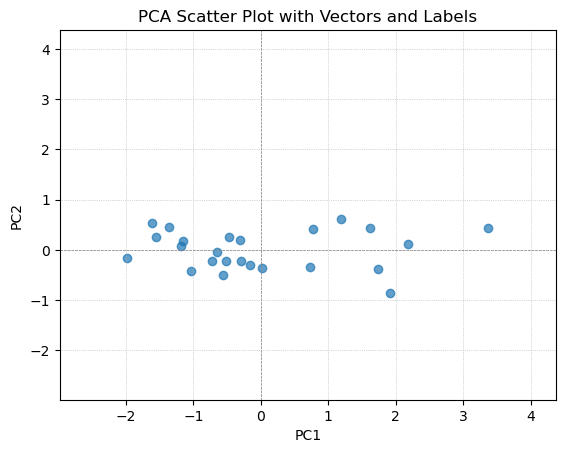

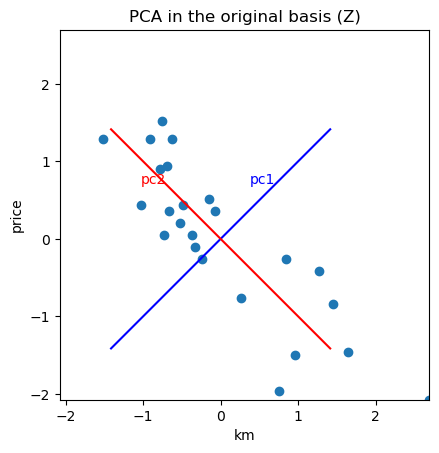

In [5]:
plot_pca_scatter(F_base)
plot_z(Z, factors=solutions[1])

#### Finally we usually present factors by their correlation with each variable; defined by: $corr(j, F_k) = sqrt(\lambda _k) * a_{jk}$

In [6]:
lambdas = solutions[0]
print('debug: vec1', vec1, 'vec2', vec2)
corrF0 = np.sqrt(lambdas[0]) * vec1
corrF1 = np.sqrt(lambdas[1]) * vec2

corr = np.column_stack((corrF0, corrF1))

res = pd.DataFrame(corr, index=df.columns, columns=['F1', 'F2'])

print(res)

debug: vec1 [ 0.70710678 -0.70710678] vec2 [0.70710678 0.70710678]
             F1        F2
km     0.963364  0.268198
price -0.963364  0.268198


In [7]:
from plots_lib import plot_variables
	

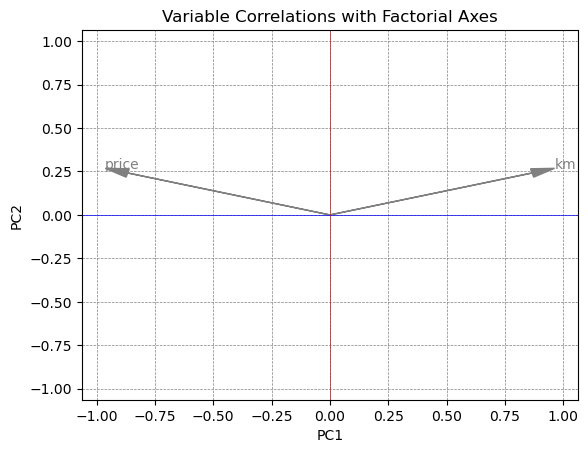

In [8]:
plot_variables(corr)

## PCA using Singular Value Decomposition

**ressources:**
- *https://eric.univ-lyon2.fr/ricco/cours/cours/Pratique_Methodes_Factorielles.pdf -> p41*
- *https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv*

SVD is a matrix decomposition matrix algorithm that has the following expression
$$
	A = U \Delta V^T
$$
- where A is the matrix we want to decompose
- Delta is a diagonal matrix containing the 'singular values'
- 

In [9]:
# numpy svd
U, delta, V = np.linalg.svd(Z)
print('Z.shape:', Z.shape)
print('U.shape:', U.shape, 'delta.shape:', delta.shape, 'V.shape:', V.shape)

Z.shape: (24, 2)
U.shape: (24, 24) delta.shape: (2,) V.shape: (2, 2)


We find back our $\lambda_k$ by squaring the singular values and dividing them by N: $\lambda_k = \delta_k / N$

In [10]:
lambdas = delta**2 / n
print('lambda_k:', lambdas)

lambda_k: [1.85613942 0.14386058]


$V^T$ matrix is the eigenvector matrix of the $Z^TZ$ diagonalisation

In [11]:
print('V transpose:\n', V.T)
print('and np.linalg.eig(R):\n', np.linalg.eig(R)[1])


V transpose:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
and np.linalg.eig(R):
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


to get the factorial coordinate and thus the factor itself we use the U matrix:
$F_{ik} = \lambda_k * u_{ik}$

the U matrix is the eigenvector of the $ZZ^t$ matrix and is (n, n) matrix
- note its funny how this method has a matrix for ever aspect of the PCA 

In [12]:

tmp = np.column_stack((U[:,0]*delta[0], U[:, 1]*delta[1], Z[:, 0], Z[:, 1]), )
print(pd.DataFrame(tmp,columns=['F_1', 'F_2', 'km', 'price']))

         F_1       F_2        km     price
0  -3.373087  0.437274  2.694332 -2.075933
1  -1.916954 -0.854653  0.751161 -1.959822
2  -1.735271 -0.379514  0.958665 -1.495379
3  -2.188265  0.128216  1.637999 -1.456675
4  -1.619700  0.435413  1.453185 -0.837417
5  -0.725737 -0.349079  0.266338 -0.760010
6  -1.192498  0.610298  1.274770 -0.411677
7  -0.021640 -0.352566 -0.234000 -0.264604
8  -0.777778  0.413424  0.842308 -0.257637
9   0.161868 -0.306186 -0.330965 -0.102049
10  0.292893 -0.229218 -0.369188  0.045025
11  0.553012 -0.489337 -0.737052  0.045025
12  0.517937 -0.224374 -0.524894  0.207580
13  0.305155  0.207348 -0.069160  0.362395
14  0.723398 -0.210894 -0.660644  0.362395
15  0.654374 -0.032400 -0.485623  0.439802
16  1.035455 -0.413481 -1.024553  0.439802
17  0.470860  0.249637 -0.156428  0.509469
18  1.184047  0.083802 -0.777991  0.896505
19  1.154832  0.184173 -0.686359  0.946820
20  1.553014  0.262187 -0.912752  1.283541
21  1.354177  0.461024 -0.631555  1.283541
22  1.97949

## Generalization of the PCA
### Fit in $R^p$ vs in $R^n$

- we define X the data matrix that is in all case mean centered of shape (n, p)
- we define M as a definite matrix of shape (p, p)
- we have M a metric matrix that define the distances behaviour in $R^p$ in most of the cases it is $I$
- M is a weighting matrix in $R^n$ 
- we define N as a diagonal matrix of shape (n, n) where all $N_{ii}$ > 0 is most of the case all $N_{ii}$ are set to 1/n
- N is a weighting matrix in $R^p$ and a metric matrix in $R^n$


We want to maximise the projected variance on a axis $\vec{u}$. where $\vec{u} * \vec{u} = 1$

We have find that :
$$
	\Lambda_T = N*(XM\vec{u})^2 = \vec{u}^TN(X^TX)\vec{u}
$$

maximising the $\Lambda_T$ using the second expression and using the Lagrangian we find that the best $\vec{u}$ is the eigen vector of the correlation matrix associated with the highest eigenvalue
this is what we do down here

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = pd.read_csv('./data.csv')

n, p = len(X), len(X.columns)
print(n, p)

Z = (X - np.mean(X, axis=0))/ np.std(X, axis=0)

24 2


#### In $R^p$ i.e the *correlation matrix*

In [14]:
zigma = np.matmul(Z.T, Z) / n

print(np.trace(zigma))

2.0


### A very important propertie:

- we can maximise the inertia both in R^n and R^p because the total information available is the same in both space 
	- you can see that $trace(ZZ^T) == trace(Z^TZ)$

#### In $R^n$ correlation between the individuals

In [15]:
zigma_bis = np.matmul(Z, Z.T) / n
np.trace(zigma_bis)


1.9999999999999998

In [16]:

zigma = np.array(zigma)
zigma_bis = np.array(zigma_bis)
print("Z.T*Z:", end=' ')
for i in range(p):
    print(zigma[i, i], end=' ')
print()
print("Z*Z.T:", end=' ')
for i in range(n):
    print(zigma_bis[i, i], end=' ')
print()
    

Z.T*Z: 1.0 0.9999999999999999 
Z*Z.T: 0.4820384963128017 0.18354773535683985 0.1314665239694752 0.2002060242348863 0.11720890657582705 0.027022958301856772 0.07477152294426977 0.00519879568884289 0.03232745482669356 0.00499797664192101 0.005763627431044618 0.022719733171776755 0.01327513152938071 0.0056713815197599665 0.02365754037481584 0.0178856559771589 0.05179724804556594 0.011834502638015979 0.05870794805227588 0.0569815139717047 0.1033580991143419 0.08526412904106774 0.16439189581416538 0.11990519846551151 


In [17]:
zigma_bis_eig = np.linalg.eig(zigma_bis)
zigma_eig = np.linalg.eig(zigma)

***We have done eigen decomposition for both the matrices. we can see that the total projected variance i.e $sum(\lambda_k)$ are the same and equal to the total inertia in normalised PCA i.e the number of variable n***

In [18]:
print(zigma_bis_eig[0].shape)
print(zigma_bis_eig[1].shape)
print(zigma_eig[0].shape)
print(zigma_eig[1].shape)

print(np.sum(zigma_bis_eig[0]))
print(np.sum(zigma_eig[0]))

(24,)
(24, 24)
(2,)
(2, 2)
(1.9999999999999998+0j)
2.0


In [19]:
b_eig_val, b_eig_vec = zigma_bis_eig[0], zigma_bis_eig[1]
eig_val, eig_vec = zigma_eig[0], zigma_eig[1]

- ***fit in $R^p$***

We project every individuals on the eigen vector to fit in $R^p$ and we confirm that we truly find the factors. Indeed, our projected value are the same than with the PCA from sklearn.
we notice tho an inversion of the second factor wich is normal because eigen vector only guaranty optimal direction but not sens 

In [20]:
F_in_p = np.dot(Z, eig_vec)

In [21]:
F_in_p = np.array(F_in_p)
pca = PCA()
F_in_p_scklearn = pca.fit_transform(Z)
for i in range(n):
    print(F_in_p[i, :], '\t', F_in_p_scklearn[i, :])
print()
    
print(np.var(F_in_p[:, 0]) + np.var(F_in_p[:, 1]))
print(np.var(F_in_p_scklearn[:, 0]) + np.var(F_in_p_scklearn[:, 1]))

[3.37308689 0.4372742 ] 	 [ 3.37308689 -0.4372742 ]
[ 1.91695448 -0.85465267] 	 [1.91695448 0.85465267]
[ 1.7352711  -0.37951386] 	 [1.7352711  0.37951386]
[2.18826537 0.12821559] 	 [ 2.18826537 -0.12821559]
[1.61970026 0.43541338] 	 [ 1.61970026 -0.43541338]
[ 0.7257374  -0.34907912] 	 [0.7257374  0.34907912]
[1.19249835 0.61029847] 	 [ 1.19249835 -0.61029847]
[ 0.02164017 -0.35256602] 	 [0.02164017 0.35256602]
[0.77777833 0.41342447] 	 [ 0.77777833 -0.41342447]
[-0.16186806 -0.30618649] 	 [-0.16186806  0.30618649]
[-0.29289298 -0.22921772] 	 [-0.29289298  0.22921772]
[-0.55301242 -0.48933716] 	 [-0.55301242  0.48933716]
[-0.5179375  -0.22437447] 	 [-0.5179375   0.22437447]
[-0.3051554   0.20734835] 	 [-0.3051554  -0.20734835]
[-0.72339796 -0.21089421] 	 [-0.72339796  0.21089421]
[-0.65437448 -0.03240037] 	 [-0.65437448  0.03240037]
[-1.03545516 -0.41348104] 	 [-1.03545516  0.41348104]
[-0.47086016  0.24963728] 	 [-0.47086016 -0.24963728]
[-1.18404729  0.08380197] 	 [-1.18404729 -0.08

- ***fit in $R^n$***

In [22]:
print('shape of the eigen vectors matrices and associated eigenvalues:', b_eig_val.shape, b_eig_vec.shape)

print('we check that every vector are of unit lenght: ', [np.round(np.dot(b_eig_vec[:, i], b_eig_vec[:, i]), 5) for i in range(b_eig_vec.shape[1])])
#print('and orhtogonal to eachother', np.round(np.dot(b_eig_vec.T, b_eig_vec)))

shape of the eigen vectors matrices and associated eigenvalues: (24,) (24, 24)
we check that every vector are of unit lenght:  [(1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (1+0j), (0.1473-0.41835j), (0.1473+0.41835j), (1+0j), (1+0j), (0.71389-0.18282j), (0.71389+0.18282j), (0.18626+0.07384j), (0.18626-0.07384j), (0.48015+0.06881j), (0.48015-0.06881j), (0.7955-0.24281j), (0.7955+0.24281j), (0.41384+0.00942j), (0.41384-0.00942j), (0.27129-0.35456j), (0.27129+0.35456j), (1+0j), (1+0j)]


In [23]:
print('b_eig_val -> ', np.round(b_eig_val, 5))
print('eig_val -> ', eig_val)

b_eig_val ->  [ 1.85614+0.j -0.     +0.j  0.14386+0.j  0.     +0.j  0.     +0.j
 -0.     +0.j -0.     +0.j -0.     -0.j  0.     +0.j -0.     +0.j
 -0.     +0.j -0.     -0.j  0.     +0.j  0.     -0.j -0.     +0.j
 -0.     -0.j  0.     +0.j  0.     -0.j  0.     +0.j  0.     -0.j
 -0.     +0.j -0.     -0.j  0.     +0.j  0.     +0.j]
eig_val ->  [1.85613942 0.14386058]


#### Apparently there is only two vector that are meaning full when we fit in $R^n$ they have the same value than eigen values in $R^p$
#### Lets try to get the $F_1$ from the fit in $R^n$ using the transition relationship: 
$$
u_1 = 1 / sqrt(\lambda_1)*N^{1/2}*Z^Tv_1
$$

In [24]:
v = b_eig_vec[:, 0]
lambda_k = b_eig_val[0]
print(v, lambda_k)

[ 0.50537832+0.j  0.28721088+0.j  0.25998986+0.j  0.32786048+0.j
  0.24267427+0.j  0.10873481+0.j  0.17866804+0.j  0.00324227+0.j
  0.11653192+0.j -0.02425215+0.j -0.04388318+0.j -0.082856  +0.j
 -0.07760084+0.j -0.04572041+0.j -0.1083843 +0.j -0.09804274+0.j
 -0.15513878+0.j -0.0705474 +0.j -0.17740184+0.j -0.17302459+0.j
 -0.23268288+0.j -0.20289186+0.j -0.29658155+0.j -0.24128233+0.j] (1.8561394207905022+0j)


In [25]:
u_k = np.dot((1/np.sqrt(lambda_k * n) * Z.T), v)
print(u_k)

[ 0.70710678+0.j -0.70710678+0.j]


#### this look good since *u_k* is leaving in $R^p$, lets check that it is unit vector and project Z onto it to see if we find back $F_1$

In [26]:
print('norm of u_k = ', np.sqrt(np.sum(u_k**2)))


#u_k = u_k / np.sqrt(np.sum(u_k**2))

#print('normalised u_k:', u_k)

norm of u_k =  (1+0j)


we can see that, at a normalization factor close, we get our factor f_1

In [27]:
F_1_p = np.dot(Z, u_k)

for val in F_1_p:
	print(val)

(3.3730868922409254+0j)
(1.916954477062689+0j)
(1.735271103980673+0j)
(2.1882653733544357+0j)
(1.6197002631341277+0j)
(0.7257373955282227+0j)
(1.1924983541701013+0j)
(0.021640169748137067+0j)
(0.7777783265257877+0j)
(-0.161868064986905+0j)
(-0.2928929780971659+0j)
(-0.553012422155662+0j)
(-0.5179374981426189+0j)
(-0.305155400145794+0j)
(-0.7233979560941377+0j)
(-0.6543744797173396+0j)
(-1.0354551561043714+0j)
(-0.47086016322305047+0j)
(-1.1840472894659246+0j)
(-1.1548318434923517+0j)
(-1.5530139357279684+0j)
(-1.35417731076892+0j)
(-1.9794979269590975+0j)
(-1.6104099306637958+0j)


#### Now trying to get $\vec{v}$ in $R^n$ from $\vec{u}$ with the transition relationship formulae:
$$
\vec{v} = 1/sqrt(\lambda) * N^{1/2}*Z\vec{u}
$$

In [28]:
u_1 = eig_vec[:, 0]
lambda_1 = eig_val[0]

v_1 = 1 / np.sqrt(lambda_1 * n) * np.dot(Z, u_1)
print('v_1: ', v_1)
print('norm of v_1: ',  np.sqrt(np.sum(u_1**2)))

v_1:  [ 0.50537832  0.28721088  0.25998986  0.32786048  0.24267427  0.10873481
  0.17866804  0.00324227  0.11653192 -0.02425215 -0.04388318 -0.082856
 -0.07760084 -0.04572041 -0.1083843  -0.09804274 -0.15513878 -0.0705474
 -0.17740184 -0.17302459 -0.23268288 -0.20289186 -0.29658155 -0.24128233]
norm of v_1:  1.0


$\vec{v_1}$ should be the same as the 1st eigen vector from eigen decomposition of $ZZ^T$

In [29]:
for val1, val2 in zip(v_1, b_eig_vec[:, 0]):
	print(val1, '\t', val2)
	

0.5053783240939604 	 (0.5053783240939608+0j)
0.2872108759518904 	 (0.28721087595189043+0j)
0.25998986400134244 	 (0.25998986400134233+0j)
0.32786047984788147 	 (0.32786047984788147+0j)
0.24267427157011576 	 (0.24267427157011573+0j)
0.1087348059512046 	 (0.10873480595120463+0j)
0.1786680387930683 	 (0.17866803879306833+0j)
0.003242274234197573 	 (0.0032422742341975635+0j)
0.11653192453487861 	 (0.11653192453487866+0j)
-0.024252150632581862 	 (-0.024252150632581876+0j)
-0.04388317500806979 	 (-0.04388317500806982+0j)
-0.0828560010579793 	 (-0.08285600105797934+0j)
-0.07760084253946918 	 (-0.07760084253946917+0j)
-0.04572041267856199 	 (-0.045720412678561986+0j)
-0.10838429556760412 	 (-0.10838429556760415+0j)
-0.09804273902641741 	 (-0.09804273902641737+0j)
-0.15513878182925284 	 (-0.15513878182925284+0j)
-0.07054740294999706 	 (-0.07054740294999708+0j)
-0.17740184404225087 	 (-0.1774018440422508+0j)
-0.17302459151497523 	 (-0.1730245915149752+0j)
-0.23268288224005435 	 (-0.2326828822400

#### Now from that how to find back the correlation of variables on F1

- the nice thing is that correlation with variables in $R^n$ equals their position on the factorial axis in $R^p$

In [30]:
# lets try to project our variables onto v_1

var_coordinate = np.dot(Z.T, v_1) * 1/np.sqrt(n)
print(var_coordinate)

[ 0.96336375 -0.96336375]


### Inertia contribution of individuals onto a factorial axis
- we have $\lambda_k = var(F_k)$

- knowing that each entrie is the projection of an individual onto the unit vector $\vec{u}$ the contibution of one individuals to the total intertia is then:
$$
CONTRIBUTION(z_i, F_k) = (F_{ik}^2 * p_i / \lambda_k)*100
$$
where $p_i$ is 1/N obviously

In [31]:
print('eigen value associated with first eigen vector in R^p:', eig_val[0])
print('variance on first factorial axis: ', np.var(F_in_p[:, 0]))


eigen value associated with first eigen vector in R^p: 1.8561394207905022
variance on first factorial axis:  1.8561394207905018


In [32]:
individual = F_in_p[0, 0]

ivar = (individual**2)/n
print('the fisrt individual has a variance of :', ivar)
print('wich contribute to the total inertia to: ', str(round((ivar / eig_val[0]) * 100, 3)) + '%')

the fisrt individual has a variance of : 0.47407146594198096
wich contribute to the total inertia to:  25.541%


### Inertia contribution of variable onto a factorial axis
- recall that $\lambda_k = \sum_{j}^{p}(corr(F_k, var_j)^2)$

- the contribution of one variable to the total inertia is then:
$$
CONTRIBUTION(V_j, F_k) = (V_j^2 / \lambda_k) * 100
$$

In [33]:
print('eigen value associated with first eigen vector in R^p:\t\t\t', eig_val[0])
print('variance on first factorial axis using squared correlation with axis k: ', np.sum(var_coordinate**2))

eigen value associated with first eigen vector in R^p:			 1.8561394207905022
variance on first factorial axis using squared correlation with axis k:  1.8561394207905022


In [34]:
print('contribution of variable kilometre onto F_1 is', str(round(var_coordinate[0]**2 / eig_val[0] * 100, 3)) + '%')

contribution of variable kilometre onto F_1 is 50.0%


which seem logical when you checkout the coordinate of the variable: [ 0.96336375 -0.96336375 ]

### Note on contribution:
- it is a metric that allows you to appreciate how an individual or a variable has been important in the ranking of the factorial axis and thus on its direction.

### Squared cosine of individuals with respect to an axis:
- defined as $cos^2(i,F_k)= F_{ik} / distance(i, O)$
- the cosine is the angle between the individual vector and the factorial axis. close to 0 means close to orthogonal relationship and thus poor representation

In [35]:
Z_np = np.array(Z)

Z_i = np.sum(Z_np[2, :]**2)



print('squared cosine of first individual with respect to first axis = ', F_in_p[0, 0] / np.sum(Z_i))

squared cosine of first individual with respect to first axis =  1.069057604423602


### For the variable squared cosine we have:
- $cos^2(V_j, F_k) = corr^2(V_j, F_k) / distance(V_j, 0)$
- for normalisaed PCA, $distance(V_j, 0)$ equals 1


In [36]:
correlation_matrix = np.corrcoef(F_in_p[:, 0], Z_np[:, 0])
pearson_correlation = correlation_matrix[0, 1]

print('we verify that we still have a unit variance:',  np.sum( Z_np[:, 0]**2) / n)
print('squared cosine of kilometre variable onto first axis: ', pearson_correlation**2)

we verify that we still have a unit variance: 1.0000000000000002
squared cosine of kilometre variable onto first axis:  0.928069710395251


### The V-test
- the v-test is a method that allows you to test wether a group or categorie is significantly similar (have the same caracteristics behaviour) by testing a hypothesis
- the foundational question is: if I take the center of gravity of my selected group; What is the propability that this group has been randomly selected ?
- it is a profiling method that can also be used to detect categories by finding individuals that have the same caracteristic i.e a discriminant center of gravity

our hypthesis that the group k is randomly selected has the following property:

$$
E(mean(\Psi_{k\alpha})) = 0
$$
$$
Var(\Psi_{k\alpha}) = \frac{n - n_k}{n - 1}*\frac{\lambda_\alpha}{n_k} = s_k^2
$$

according to the central limit theorem, those quantities follow a normal distribution, if we then compute the mean of our sample, standardised by the $s_k^2$ we get a value in std unit and thus, approximately interprete its positionning on the normal distribution.
$$
v_{k\alpha} = \frac{mean(\Psi_{k\alpha})}{s_k}
$$

In [37]:
print(Z.head(), '\nn = ', len(Z))
diff = np.abs(Z_np[:, 0] - Z_np[:, 1])

Z['abs_diff'] = diff




         km     price
0  2.694332 -2.075933
1  0.751161 -1.959822
2  0.958665 -1.495379
3  1.637999 -1.456675
4  1.453185 -0.837417 
n =  24


In [38]:
Z['is_shit'] = [(diff > 2) for diff in Z['abs_diff']]
Z

,km,price,abs_diff,is_shit
0,2.694332,-2.075933,4.770265,True
1,0.751161,-1.959822,2.710983,True
2,0.958665,-1.495379,2.454044,True
3,1.637999,-1.456675,3.094675,True
4,1.453185,-0.837417,2.290602,True
5,0.266338,-0.760010,1.026348,False
6,1.274770,-0.411677,1.686447,False
7,-0.234000,-0.264604,0.030604,False
8,0.842308,-0.257637,1.099945,False
9,-0.330965,-0.102049,0.228916,False


##### We have created fake categories based on the difference, the main idea is: bigger is the abs difference between km and price, shittier is the car
##### - lets take the projected 'not shitty cars' sub group and compute the v-test 

In [39]:
not_is_shit_mask = np.array([(val == False) for val in Z['is_shit']])


F1_not_shit = F_in_p_scklearn[:, 0][not_is_shit_mask]
nk = len(F1_not_shit)
mu = np.mean(F1_not_shit)
var = (n - nk) / (n - 1) * (eig_val[0] / nk)

In [40]:
v = mu / np.sqrt(var)
print('v-test for not shitty car:', v)

v-test for not shitty car: -1.7704884490766106


##### Now with the shitty car:

In [41]:
is_shit_mask = np.array(Z['is_shit'])

F1_shit = F_in_p_scklearn[:, 0][is_shit_mask]
nk = len(F1_shit)
mu = np.mean(F1_shit)
var = (n - nk) / (n - 1) * (eig_val[0] / nk)

In [42]:
v = mu / np.sqrt(var)
print('v-test for not shitty car:', v)

v-test for not shitty car: 1.770488449076611


##### we have nicely inverted value wich seems a bit weird tho lets not lie

### Finally lets do a biplot of our data into the individual space defined $R^p$
- for that we need the coordinate of our variables onto the factorial axis translated into R^p

recall that the corrdinate of the variable $j$ on to the axis $F_k$ =
$$
sqrt(\lambda_k)u_{jk}
$$


In [43]:
var1_x, var1_y = np.sqrt(eig_val[0]) * eig_vec[0, 0],  np.sqrt(eig_val[1]) * eig_vec[0, 1]
var2_x, var2_y = np.sqrt(eig_val[0]) * eig_vec[1, 0],  np.sqrt(eig_val[1]) * eig_vec[1, 1]

print('var1_x:', var1_x, 'var1_y: ', var1_y)
print('var2_x:', var2_x, 'var2_y: ', var2_y)

print('variable are on the unit circle: ', var1_x**2 + var1_y**2)
print('variable are on the unit circle: ', var2_x**2 + var2_y**2)

var1_x: 0.9633637477065717 var1_y:  0.26819822819092026
var2_x: -0.9633637477065716 var2_y:  0.2681982281909203
variable are on the unit circle:  1.0000000000000002
variable are on the unit circle:  1.0


for the simultaneous representation of the variables and the individuals, we can see that as a projection of the variables onto the factorial axis
and the projected variable like artificial individuals.
the trap to not fall in is to interpret the position of a variable regarding the position of an indidual which make no sens at all since variable are computed based on their correlation with the axis while individuals are computed base on their distance between each other

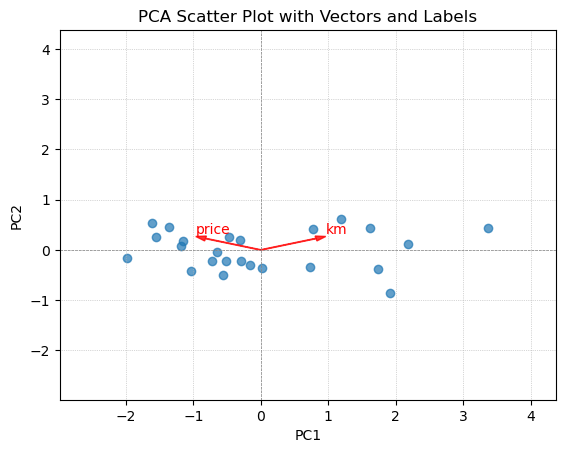

In [44]:

var_coord = np.array([[var1_x, var1_y], [var2_x, var2_y]])
plot_pca_scatter(F_in_p, var_coord, ['km', 'price'])